# Implementing K-Means to define center of clusters

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

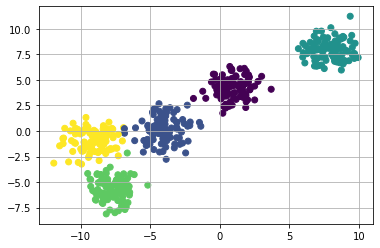

In [3]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
# taken random  centers and give them random colors for all clusters
k = 5
color = ["green","red","blue","yellow","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],)) - 1)
    points = []
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i] = cluster


In [5]:
print(clusters)

{0: {'center': array([-9.92235827, -7.27776204]), 'points': [], 'color': 'green'}, 1: {'center': array([-0.27450092,  3.49463782]), 'points': [], 'color': 'red'}, 2: {'center': array([ 1.26585115, -2.51579732]), 'points': [], 'color': 'blue'}, 3: {'center': array([-5.84718899,  1.21498795]), 'points': [], 'color': 'yellow'}, 4: {'center': array([ 2.61367845, -6.85632771]), 'points': [], 'color': 'orange'}}


In [6]:
# eucledian distance between point and center
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [7]:
def assignPointsToClusters(clusters):
    
    for i in range(X.shape[0]):
        dist = []
        for kx in range(k):
            d = distance(X[i],clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(X[i])


In [8]:
def plotClusters(clusters,k=5):
    for kx in range(k):
        points = np.array(clusters[kx]['points'])
        center = np.array(clusters[kx]['center'])
        try:
            plt.scatter(points[:,0],points[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        plt.scatter(center[0],center[1],color='black',marker='*')

In [9]:
def updateClusters(clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0 :
            u = points.mean(axis=0)
            clusters[i]['center'] = u
            clusters[i]['points'] = []

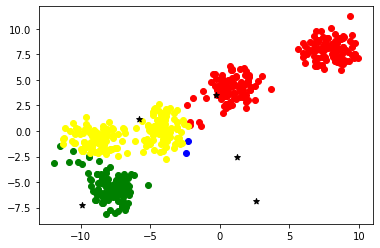

In [10]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

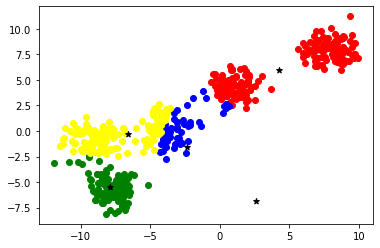

In [11]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

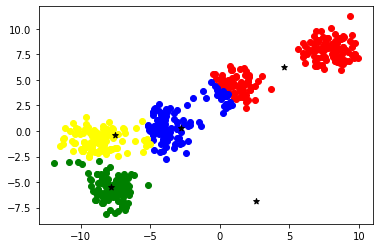

In [12]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

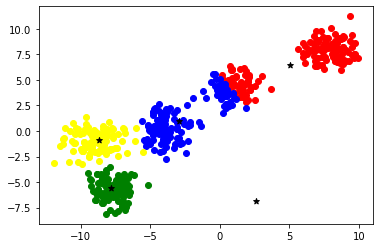

In [13]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

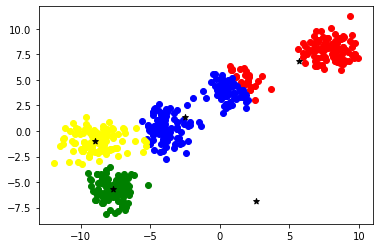

In [14]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

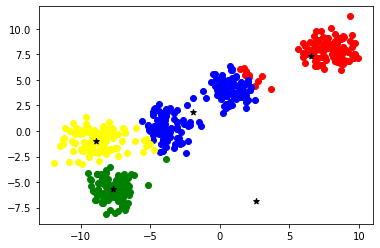

In [15]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

# Using Scikit K-Means++

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=5)

In [18]:
kmeans.fit(X,Y)

KMeans(n_clusters=5)

In [19]:
centers = kmeans.cluster_centers_

In [20]:
predict = kmeans.predict(X)

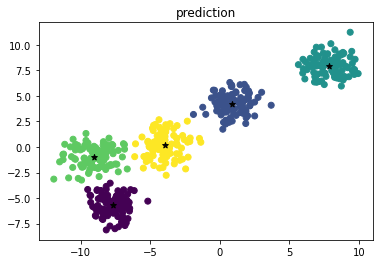

In [21]:
plt.title("prediction")
plt.scatter(X[:,0],X[:,1],c=predict)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')
plt.show()

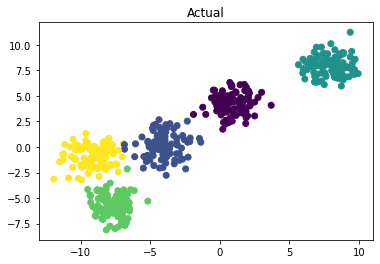

In [22]:
plt.title("Actual")
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

## Hence Clusters are predicted succesfully

# Kmeans++ and Kmeans fails , DBscan using sklearn

In [23]:
from sklearn.datasets import make_moons

In [24]:
X,Y = make_moons(n_samples=500,noise=0.10)

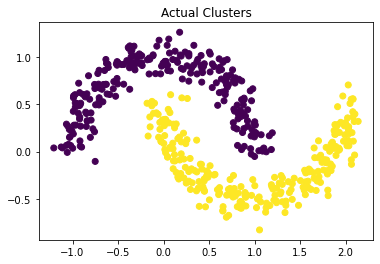

In [25]:
plt.title("Actual Clusters")
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
dbscan = DBSCAN(eps=0.15,min_samples=5)

In [28]:
dbscan.fit(X)

DBSCAN(eps=0.15)

In [29]:
Ypred = dbscan.labels_

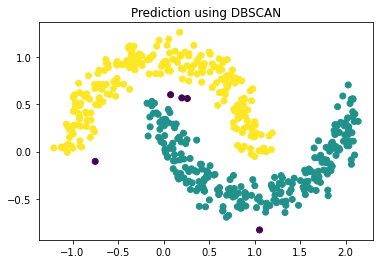

In [30]:
plt.title("Prediction using DBSCAN")
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()

## Prediction Using Kmeans

In [31]:
kmeans = KMeans(n_clusters=2)

In [32]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [33]:
Ypred = kmeans.predict(X)
centers = kmeans.cluster_centers_

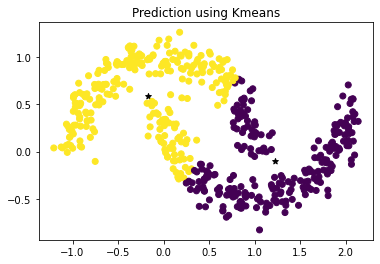

In [34]:
plt.title("Prediction using Kmeans")
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()

# Hence You can see that DBSCAN is predicting non-linear separable data much better than kmeans 